In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [11]:
car_data = pd.read_csv('./datasets/auto-mpg.csv')
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [12]:
car_data.shape

(398, 9)

In [13]:
# This dataset contains data with ? mark
car_data.replace('?', np.nan, inplace=True)
car_data.dropna(inplace=True)
car_data.shape

(392, 9)

In [14]:
car_data.drop(['origin', 'car name'], axis=1, inplace=True)
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [15]:
# here we fix model year
car_data['model year'] = '19' + car_data['model year'].astype(str)
car_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
169,20.0,6,232.0,100,2914,16.0,1975
277,16.2,6,163.0,133,3410,15.8,1978
313,28.0,4,151.0,90,2678,16.5,1980
89,15.0,8,318.0,150,3777,12.5,1973
187,17.5,8,305.0,140,4215,13.0,1976


In [16]:
from datetime import datetime

car_data['age'] = datetime.now().year - pd.to_numeric(car_data['model year'])

In [17]:
car_data.drop(['model year'], axis=1, inplace=True)
car_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
147,24.0,4,90.0,75,2108,15.5,47
357,32.9,4,119.0,100,2615,14.8,40
235,26.0,4,97.0,75,2265,18.2,44
6,14.0,8,454.0,220,4354,9.0,51
293,31.9,4,89.0,71,1925,14.0,42


In [18]:
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [19]:
# horsepower is not in numeric type, so convert it
car_data['horsepower'] = pd.to_numeric(car_data['horsepower'], errors='coerce')
car_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,45.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,42.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,45.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


In [20]:
# save pre-processed file
car_data.to_csv('./datasets/automobile_data_processed.csv', index=False)

In [21]:
!ls datasets/

500_Person_Gender_Height_Weight_Index.csv  mall_data_index_oriented.json
automobile_data_processed.csv		   mall_data_processed.csv
auto-mpg.csv				   mall_data_records_oriented.json
house_data_processed.csv		   mall_data_values_oriented.json
HousingData.csv				   Salary_Data.csv
Mall_Customers.json			   sp500_1987.csv
mall_data_column_oriented.json		   weight-height.csv


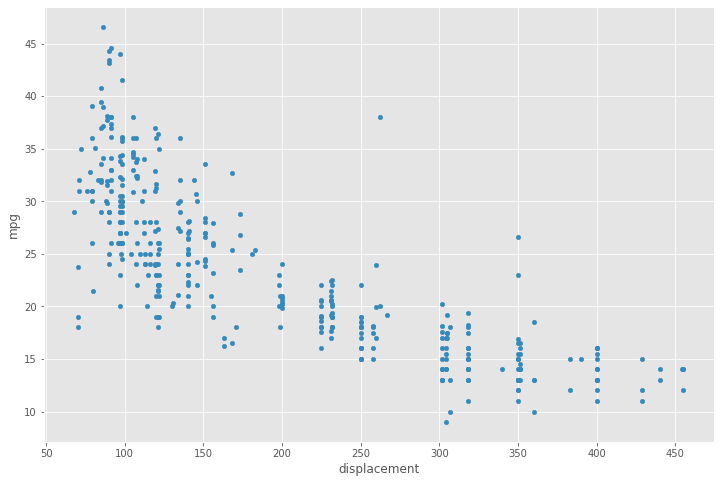

In [24]:
car_data.plot.scatter(x='displacement', y='mpg', figsize=(12,8))
plt.show()

# negative relation => the more powerful a car the less mpg

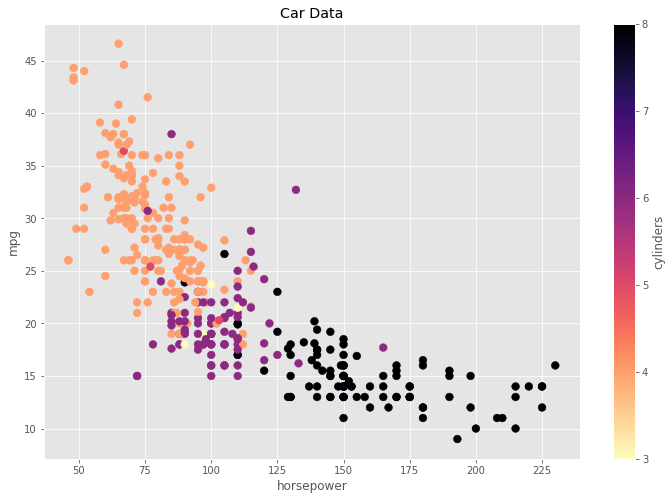

In [25]:
# third demention => cylinders
fig, ax = plt.subplots()
car_data.plot(x='horsepower', y='mpg', kind='scatter', s=60, c='cylinders',
              cmap='magma_r', title='Car Data', figsize=(12,8), ax=ax)
plt.show()

In [28]:
# positive relationship
car_data['acceleration'].cov(car_data['mpg'])

9.115514379664912

In [29]:
# positive relationship and its strngth -1<=corr<=+1
car_data['acceleration'].corr(car_data['mpg'])

0.4233285369027874

In [30]:
car_data['horsepower'].cov(car_data['mpg'])

-233.85792577900727

In [31]:
car_data['horsepower'].corr(car_data['mpg'])

-0.7784267838977756

In [32]:
car_data['horsepower'].cov(car_data['displacement'])

3614.0337439323553

In [33]:
car_data['horsepower'].corr(car_data['displacement'])

0.8972570018434683

In [34]:
car_cov = car_data.cov()
car_cov

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,60.918142,-10.352928,-657.585207,-233.857926,-5517.440704,9.115514,-16.691477
cylinders,-10.352928,2.909696,169.721949,55.348244,1300.424363,-2.375052,2.171930
displacement,-657.585207,169.721949,10950.367554,3614.033744,82929.100139,-156.994435,142.572133
horsepower,-233.857926,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,59.036432
weight,-5517.440704,1300.424363,82929.100139,28265.620231,721484.709008,-976.815253,967.228457
acceleration,9.115514,-2.375052,-156.994435,-73.186967,-976.815253,7.611331,-2.950462
age,-16.691477,2.171930,142.572133,59.036432,967.228457,-2.950462,13.569915


In [35]:
car_corr = car_data.corr()
car_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


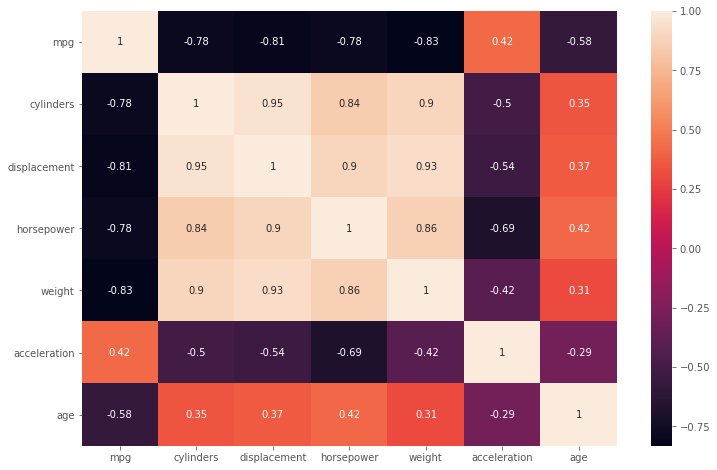

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(car_corr, annot=True)
plt.show()